# Homework 9: Bayesian Models and Neural Networks

By Rachel Manzelli and Brian Kulis with the help of N. Frumkin, K. Chauhan, and A. Tsiligkaridis

## Problem 1: Bayesian Models

Paleobotanists estimate the moment in the past when a 
given species became extinct by taking cylindrical, vertical core 
samples below the earth's surface, and looking for the last
occurrence of the species in the fossil record. This is measured in meters
above the point $P$ at which the species was known to have first
emerged.  

Letting $\{y_i, i = 1, \ldots, n\}$ denote a sample of
such distances above $P$ at a random set of locations, the model can be represented as

\begin{equation*}
(y_i | \theta) \sim \mbox{Unif}(0,\theta)
\end{equation*}

In this model the unknown $\theta > 0$ can be used to estimate
the species extinction time through carbon dating.  *This problem is about Bayesian inference for $\theta$, and it will be seen that some of our usual intuitions do not quite hold in this case.*

**a.** Show that the likelihood may be written as

\begin{equation*}
l(\theta | y) = 
\theta^{-n} I(\theta \geq \max(y_1, \ldots, y_n)),
\end{equation*}

where $I$ is the **indicator function**, i.e. $I(A) = 1 $ if $A$ is true and 0 otherwise.

**b.** The Pareto distribution (written $\theta \sim \mbox{Pareto}(\alpha,\beta)$
has density/PDF:

\begin{equation*}
p(\theta) = \left\{
\begin{array}{cc}
\alpha \beta^\alpha \theta^{-(\alpha + 1)} & \mbox{if}\ \theta \geq \beta \\
0 & \mbox{otherwise}
\end{array},
\right .
\end{equation*}
where $\alpha, \beta > 0$.

With the likelihood viewed as a constant multiple of a
density for $\theta$, show that the likelihood corresponds to
the $\mbox{Pareto}(n-1,m)$ distribution, *where you will need to determine m.*

Now, let the prior
for $\theta$ be taken to be $\mbox{Pareto}(\alpha,\beta)$
and derive the posterior distribution $p(\theta | y)$.

Is the Pareto conjugate to the uniform? As discussed in class, a likelihood and prior are conjugate pairs if the posterior distribution is in the same class (in this case, a Pareto distribution) as the prior.

**c.** In an experiment conducted in the Antarctic in the
1980's to study a particular species of fossil ammonite,
the following was a linearly rescaled version of the data
obtained, in ascending order: 

$y = (0.4, 1.0, 1.5, 1.7, 2.0, 2.1, 3.1, 3.7, 4.3, 4.9)$.  

Prior information equivalent to a Pareto prior with $(\alpha,\beta) = (2.5,4)$ was available. Plot the prior, likelihood, and posterior distributions arising from this data set on the same graph, and briefly discuss what this picture implies about the updating of information from prior to posterior in this case.

**`The solutions to this question are added in a separate document in this folder.`**

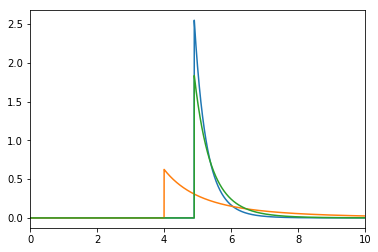

In [16]:
#PART C graphs

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pareto

# POSTERIOR
xm = 4.9 # scale 
alphas = 12.5 # shape parameters

# PRIOR
xm1 = 4 # scale 
alphas1 = 2.5 # shape parameters

# LIKELIHOOD
xm2 = 4.9
alphas2 = 9

x = np.linspace(0, 20, 10000)

output = pareto.pdf(x, scale = xm, b = alphas) #POSTERIOR
output2 = pareto.pdf(x, scale = xm1, b = alphas1) #PRIOR
output3 = pareto.pdf(x, scale = xm2, b = alphas2) #LIKELIHOOD

plt.plot(x, output.T)
plt.plot(x, output2.T)
plt.plot(x, output3.T)
plt.xlim([0,10])
plt.show()

## Problem 2: Limitations of the Perceptron

We aim to train a perceptron to model the logic functions **OR**$(x_1,x_2)$ and **XNOR**$(x_1, x_2)$, using the set of four 2D points, $x \in \{(0,0)^T, (1,0)^T, (0,1)^T, (1,1)^T\}$.

In order to model **OR**$(x_1,x_2)$, the perceptron classifier must output $1$ for $x \in \{(1,0)^T,(0,1)^T, (1,1)^T\}$ and output $0$ if $x = (0,0)^T$. The perceptron classifier (activation threshold of the perceptron) is represented by $f(x) =\mathbf 1[ w^Tx + b > 0]$.

Instead of using a bias vector $b$, we can augment the data by $1$ and use a linear classifier: $f(x) =\mathbf 1[ w^T x > 0 ]$. To do this, we replace $x$ with $x$ $\in \{(1,1,0)^T,(1,0,1)^T, (1,1,1)^T, (1,0,0)\}$ and $w$ with a vector in $\mathbb{R^3}$.

**a.** Using the initial weight vector $w_0 = (0,0,0)^T$ and the [perceptron algorithm](https://www.cs.cmu.edu/~avrim/ML10/lect0125.pdf), derive the $w$ that models the **OR**$(x_1,x_2)$ function. **You can do this either manually (i.e. writing out the weight updates) or by programming the algorithm in Jupyter.** Before you begin, you should normalize your data.

In [1]:
# If you choose to program your algorithm, do so here. 
# Do not use sklearn except where we used it :).
# We have started you off. Fill in places where we've written "YOUR CODE HERE".
from sklearn.preprocessing import normalize
import numpy as np

# Step 1. Initialize weight vector & define data.
x = np.array([[1, 1, 0], [1, 0, 1], [1, 1, 1], [1, 0, 0]]) # given data
y = np.array([1, 1, 1, 0]) # correct predictions
w = np.array([0, 0, 0])

# Normalize each sample to have norm 1.
x = normalize(x, norm='l2')

# Step 2. Activation threshold (prediction).
def predict(sample, weights):
    ## YOUR CODE HERE: Return the prediction (1 or 0) based on the activation threshold
    return 1 if (np.dot(weights, sample) > 0) else 0
    ##

# Step 3. Updating weights.
def update(w, x, y, epochs):
    for j in range(epochs):
        i = 0
        for sample in x:
            # Make prediction using the above function
            prediction = predict(sample, w)
            
            ## YOUR CODE HERE: Update weights according to the link above (pg. 2)
            # Hint: how do we usually update weights? Use the true label somewhere...
            w = w + (y[i] - prediction) * sample
            ##
            
            i += 1
            # This will help us see how often we make mistakes
            print("Weight vector on epoch ", j, " sample ", i, "is ", w)
    return w

# Now, run the perceptron! Remember, you are done when the weight vector stabilizes.
epochs = 4 # "stop criteria" - arbitrary, feel free to change as you see fit.
w_new = update(w, x, y, epochs)
print("The final weight vector to model OR(x1,x2) with this data is: ", w_new)

Weight vector on epoch  0  sample  1 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  2 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  3 is  [0.70710678 0.70710678 0.        ]
Weight vector on epoch  0  sample  4 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  1 is  [-0.29289322  0.70710678  0.        ]
Weight vector on epoch  1  sample  2 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  3 is  [0.41421356 0.70710678 0.70710678]
Weight vector on epoch  1  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  1 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  2 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  3 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  2  sample  4 is  [-0.58578644  0.70710678  0.70710678]
Weight vector on epoch  3  sample  1 is  [-0.58578644  0.70710678  

**b.** We just showed that a perceptron can model **OR**$(x_1, x_2)$ successfully. Prove that a perceptron can't model **XNOR**$(x_1, x_2)$. *Hint: think about linearity.*

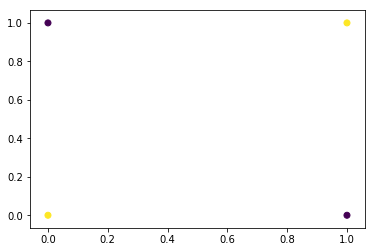

In [8]:
import matplotlib.pyplot as plt

x = [0,0,1,1]
y = [0,1,0,1]
labels = [1,0,0,1] # Correct classification using XNOR of input

plt.scatter(x,y,c=labels) # color according to labels
plt.show()

**`XNOR is not a linearly separable function, and the perceptron is a linear classifier.`**

XNOR is not linearly separable because we cannot separate the two output classes (0 and 1) with a line. (If we plot OR in a similar way, we see that it is linearly separable, so it can be modeled by a linear classifier.) 

## Problem 3: Neural Networks and the XNOR Problem

So, the perceptron can't model the **XNOR**$(x_1, x_2)$ function. We now want to design a neural network (by hand) to solve the **XNOR** problem. 

**a.** Write the **XNOR** function in terms of the logical functions **OR**$(x_1,x_2)$, **AND**$(x_1,x_2)$, **NOR**$(x_1,x_2)$. 

**`Solution:`**

**XNOR**$(x_1,x_2) = $ **OR**$\big($**AND**$(x_1,x_2), $**NOR**$(x_1,x_2)\big)$

You can draw this out using truth tables, equality of logic gates, etc.

**b.** We will now design a network to model this function, using the hyperbolic tangent ([$tanh$](http://reference.wolfram.com/language/ref/Tanh.html)) as the activation function in all of the nodes. The network will take two binary variables as input, and output 1 only when the inputs are both 0 or both 1.

The $tanh$ function outputs [-1,+1], not our desired output of [0,1]. Thus, we have appropriately changed the OR node to take +1/-1 as inputs. Also, we have added an extra last layer to convert the final output from +1/-1 to 0/1.

*Hint: assume that $tanh$ outputs -1 for any input $x\leq -2$, +1 for any input $x\geq 2$, and 0 for $x=0$.*

<img src="xnor1.png" style="height:130px;"><img src="xnor2.png" style="height:110px;">

What are the missing weights $a,b,c,d,e,f$ of the **OR**, **NAND**, **AND** and **CONVERT** subnetworks, respectively?

**`The solutions to this question are added in a separate document in this folder.`**